# Exercise 5: Observation model


## 5.1 Implement model for perceiving landmarks

Consider a robot that operates in an environment populated by **range-only** sensors such as _beacons_.
These sensors transmit a signal that allows for obtaining noisy measurements of their distance from a receiver mounted on the robot.

The function `landmark_observation_model` realizes the observation model for perceiving landmarks with a range sensor. It takes as input:
 
- the observed noisy range $z$
- the standard deviation of the measurement $\sigma_z$ (zero-mean Gaussian noise)
- the position of the robot in the map $x$
- the position of the beacon transmitting beacon in the map $m$

The output of this function is the probability $p(z | x, m)$ that the measurement $z$ was obtained at position $x$.

Implement the `landmark_observation_model` function and verify that it is correct for some test input. **[2.0]**

[[5.05227108e-15 9.13472041e-12 6.07588285e-09 1.48671951e-06
  1.33830226e-04 4.43184841e-03 5.39909665e-02 2.41970725e-01
  3.98942280e-01 2.41970725e-01]]


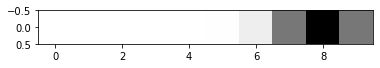

In [6]:
from ex5 import *
import numpy as np
gridmap = np.zeros((1,10))
# print(gridmap)
z = 8
# x = [0,0]
sigma =1
m =[0,0]
for i in range(gridmap.shape[1]):
    # print(landmark_observation_model(z,[0,i],m,sigma))
    gridmap[0][i] = landmark_observation_model(z,[0,i],m,sigma)

print(gridmap)
plot_map(gridmap)



---

## 5.2 Compute likelihood of measurement in the environment

The robot operates in an environment that is represetend by a 20x20 grid map and contains a beacon at position $m_1 = [0,0]$ (top-left corner). 

The robot obtains a range measurement of the beacon $z_1 = 10$ and the sensor noise is $\sigma_{z1} = 1$.

Compute the `landmark_observation_model` at each cell of the environment and plot the likelihood of the observation over the environment. **[1.0]** 

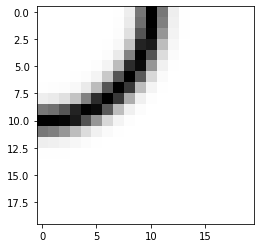

In [7]:
gridmap = np.zeros((20,20))
m =[0,0]
z= 10
sigma = 1
for i in range(gridmap.shape[0]):
    for j in range(gridmap.shape[1]):
        gridmap[i][j] = landmark_observation_model(z,[i,j],m,sigma)
# print(gridmap)
plot_map(gridmap)

---

## 5.3 Multiple landmarks

Assume that we install two **additional** beacons in our environment:

- $m_2 = [0, 10]$
- $m_3 = [10, 0]$

from which we obtain the following observations:

- $z_2 = 5$ with $\sigma_{z2} = 3$
- $z_3 = 9$ with $\sigma_{z3} = 2$

Compute the `landmark_observation_model` at each cell of the environment considering the measurements from **all** beacons and plot the **joint** likelihood of the observations over the environment. **[2.0]** 

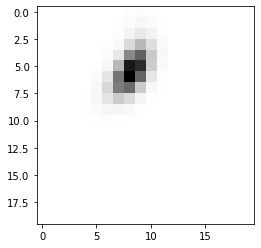

In [8]:
# since the measurements from both beacons are independent p(z|x,cell) = p(z|x1,cell)*p(z|x2,cell) where x1 and x2 are beacon positions
gridmap = np.ones((20,20))
m =np.array([[0,0],[0,10],[10,0]])
obs= np.array([[10,1],[5,3],[9,2]])
for i in range(gridmap.shape[0]):
    for j in range(gridmap.shape[1]):
        for k in range(m.shape[0]):
            gridmap[i][j] *= landmark_observation_model(obs[k][0],[i,j],m[k],obs[k][1])
# print(gridmap)
plot_map(gridmap)